In [2]:
import pandas as pd

In [220]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [221]:
fake_df['target'] = 1
true_df['target'] = 0

In [222]:
fake_df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [223]:
true_df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [224]:
df = pd.concat([fake_df, true_df]).reset_index(drop=True)

In [226]:
df['target'].value_counts()

FAKE    23481
TRUE    21417
Name: target, dtype: int64

In [73]:
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Create columns for the number of characters in title and text
df['title_char_count'] = df['title'].apply(lambda x: len(str(x)))
df['text_char_count'] = df['text'].apply(lambda x: len(str(x)))

# Create columns for the number of words in title and text
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))

df.groupby('target')[['title_word_count', 'text_word_count', 'title_char_count', 'text_char_count']].mean()


,title_word_count,text_word_count,title_char_count,text_char_count
target,,,,
FAKE,14.732805,423.197905,94.198032,2547.396235
TRUE,9.954475,385.640099,64.667881,2383.278517


In [74]:
import pandas as pd
import string

# Assuming your data is stored in a DataFrame named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Function to count capital words in a text
def count_capital_words(text):
    return sum(1 for word in str(text).split() if word.isupper())

# Function to count special characters in a text
def count_special_characters(text):
    return sum(1 for char in str(text) if char in string.punctuation)

# Create columns for the total number of capital words in title and text
df['title_capital_word_count'] = df['title'].apply(count_capital_words)
df['text_capital_word_count'] = df['text'].apply(count_capital_words)

# Create columns for the total number of special characters in title and text
df['title_special_char_count'] = df['title'].apply(count_special_characters)
df['text_special_char_count'] = df['text'].apply(count_special_characters)

df.groupby('target')[['title_capital_word_count', 'text_capital_word_count', 'title_special_char_count', 'text_special_char_count']].mean()

,title_capital_word_count,text_capital_word_count,title_special_char_count,text_special_char_count
target,,,,
FAKE,3.254759,8.915634,1.971381,59.078617
TRUE,0.388103,6.716674,1.587991,50.605780


In [71]:
import textstat

# Create columns for the Flesch Reading Ease score in title and text
df['title_flesch_score'] = df['title'].apply(lambda x: textstat.flesch_reading_ease(str(x)))
df['text_flesch_score'] = df['text'].apply(lambda x: textstat.flesch_reading_ease(str(x)))



In [72]:
df.groupby('target')[['title_flesch_score', 'text_flesch_score']].mean()

,title_flesch_score,text_flesch_score
target,,
FAKE,61.963005,62.060266
TRUE,59.042823,51.916704


In [83]:
nlp = spacy.load('en_core_web_sm')

# Returns number of other nouns
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count("NOUN")

In [84]:
df['num_noun'] = df['title'].apply(nouns)

# Compute mean of other nouns
df.groupby('target')[['num_noun']].mean()

,num_noun
target,
FAKE,1.679358
TRUE,3.134146


In [85]:
nlp = spacy.load('en_core_web_sm')

# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

In [86]:
df['num_propn'] = df['title'].apply(proper_nouns)

In [87]:
df.groupby('target')[['num_propn']].mean()

,num_propn
target,
FAKE,6.715557
TRUE,2.353878


In [95]:
ner_features = df.loc[:,'text_organizations':]

#### Warning

The cell below can run very long

In [89]:
def extract_entities(text, model=nlp):
    doc = model(text)
    
    organizations = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    locations = [ent.text for ent in doc.ents if ent.label_ == 'LOC']
    
    return organizations, persons, locations

# Apply the function to the DataFrame
df[['text_organizations', 'text_persons', 'text_locations']] = df['text'].apply(extract_entities).apply(pd.Series)
df[['title_organizations', 'title_persons', 'title_locations']] = df['title'].apply(extract_entities).apply(pd.Series)


In [100]:
df['text_organizations_count'] = df['text_organizations'].apply(lambda x: len(str(x)))
df['text_persons_count'] = df['text_persons'].apply(lambda x: len(str(x)))
df['text_locations_count'] = df['text_locations'].apply(lambda x: len(str(x)))
df['title_organizations_count'] = df['title_organizations'].apply(lambda x: len(str(x)))
df['title_persons_count'] = df['title_persons'].apply(lambda x: len(str(x)))
df['title_locations_count'] = df['title_locations'].apply(lambda x: len(str(x)))

In [101]:
df.groupby('target')[['text_organizations_count', 'text_persons_count', 'text_locations_count', 'title_organizations_count', 'title_persons_count', 'title_locations_count']].mean()

,text_organizations_count,text_persons_count,text_locations_count,title_organizations_count,title_persons_count,title_locations_count
target,,,,,,
FAKE,152.873685,150.477407,8.295175,13.167327,10.236234,2.114177
TRUE,172.473736,113.475697,10.039828,8.092870,4.605407,2.285848


In [102]:
df.drop(['text_organizations', 'text_persons', 'text_locations', 'title_organizations', 'title_persons', 'title_locations'], axis=1, inplace=True)

In [125]:
df.rename(columns={'num_noun': 'title_num_noun', 'num_propn': 'title_num_propn'}, inplace=True)

In [ ]:
df['subject'].value_counts()

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns



subject_distribution = df.groupby('subject')['target'].value_counts(normalize=True).mul(100).unstack().fillna(0)
subject_distribution.plot(kind='bar', stacked=True)

plt.tick_params(axis='x', rotation=45)

plt.show()

Let's remove variable subject. It would bias the results,  as its categories are predefined based on prior knowledge about the target variable.

In [131]:
df.drop('subject', axis=1, inplace=True)

KeyError: "['subject'] not found in axis"

In [229]:
df.to_csv('data_features.csv', index = False)


In [232]:
clean_df = pd.read_csv('data_features.csv')

In [233]:
data_feat = clean_df.drop(['title', 'text'], axis=1)

In [234]:
data_feat

,date,title_char_count,text_char_count,title_word_count,text_word_count,title_capital_word_count,text_capital_word_count,title_special_char_count,text_special_char_count,title_flesch_score,text_flesch_score,title_num_noun,title_num_propn,text_organizations_count,text_persons_count,text_locations_count,title_organizations_count,title_persons_count,title_locations_count,target
0,"June 3, 2016",60,2074,9,329,0,4,1,45,45.42,51.89,5,0,177,142,9,2,2,2,0
1,"June 3, 2016",54,3016,8,483,0,7,3,56,46.44,49.25,2,1,295,182,2,2,9,2,0
2,"June 3, 2016",64,3506,9,532,1,8,5,61,45.42,38.66,4,2,473,51,2,7,2,2,0
3,"June 2, 2016",65,5604,11,900,1,12,3,124,68.77,50.77,3,3,295,480,2,9,11,2,0
4,"June 3, 2016",63,3201,11,515,0,11,1,82,85.69,50.67,3,3,244,80,103,17,9,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,"January 16, 2016",61,3237,10,522,1,19,1,47,69.79,44.98,2,6,69,166,2,2,15,2,1
44894,"January 16, 2016",81,1684,12,297,2,8,7,44,50.84,65.25,8,4,91,26,2,2,2,2,1
44895,"January 15, 2016",85,25065,14,4171,1,90,1,534,57.27,51.62,1,9,986,552,107,53,2,18,1
44896,"January 14, 2016",67,2685,12,456,0,23,2,70,76.22,65.25,0,3,239,48,32,30,9,2,1


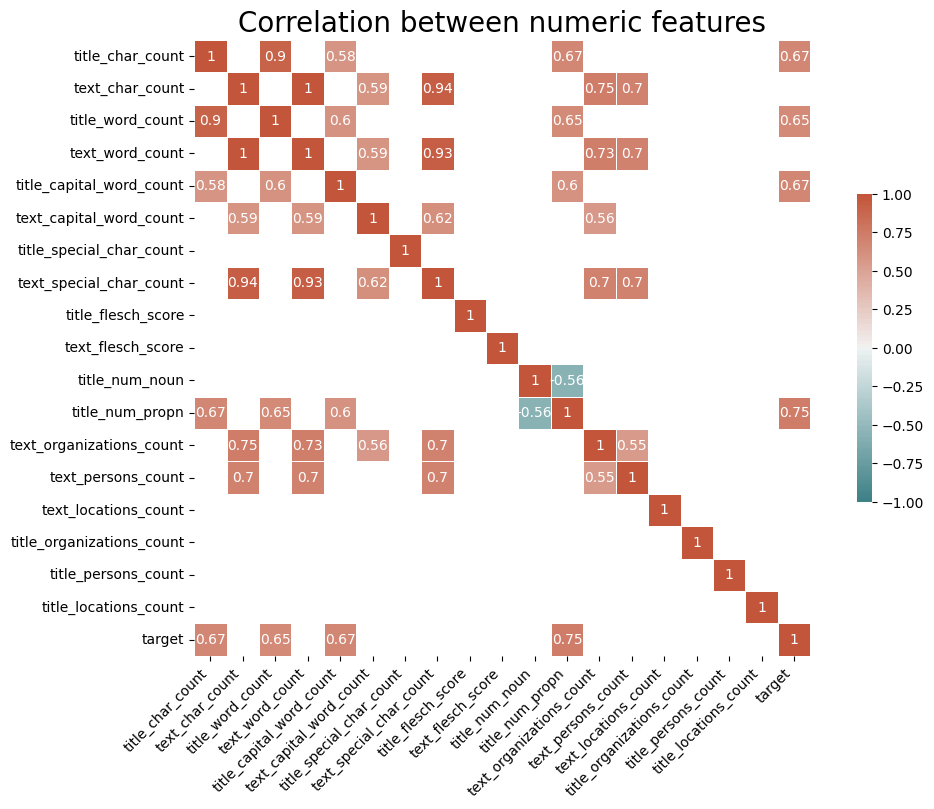

In [235]:
import numpy as np

numeric_features = data_feat.select_dtypes(include=['int64', 'float64']).columns

df_corr = data_feat[numeric_features]

corr = df_corr.corr(method = 'spearman')
mask = np.abs(corr) > 0.5

plt.figure(figsize=(12, 8))

cmap = sns.diverging_palette(200, 20, n=200)

sns.heatmap(corr[mask], cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)  

plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.title('Correlation between numeric features', size = 20)

plt.show()

In [236]:
import scipy.stats as stats

corr_results = {}  # Change results to corr_results
for col in numeric_features:
    if col != 'target':
        correlation, p_value = stats.spearmanr(data_feat[col], data_feat['target'])
        corr_results[col] = {"correlation": correlation, "p_value": p_value}

print(corr_results)


{'title_char_count': {'correlation': 0.6663301972103847, 'p_value': 0.0}, 'text_char_count': {'correlation': 0.010856588136603958, 'p_value': 0.02142430737367648}, 'title_word_count': {'correlation': 0.6496842482459865, 'p_value': 0.0}, 'text_word_count': {'correlation': 0.0343664512267752, 'p_value': 3.242887369026331e-13}, 'title_capital_word_count': {'correlation': 0.6683776623698416, 'p_value': 0.0}, 'text_capital_word_count': {'correlation': 0.013317385818758678, 'p_value': 0.004774197026450173}, 'title_special_char_count': {'correlation': 0.13401010704888386, 'p_value': 5.980900870684166e-179}, 'text_special_char_count': {'correlation': 0.05192575253393486, 'p_value': 3.429710826052898e-28}, 'title_flesch_score': {'correlation': 0.06133525848593607, 'p_value': 1.0974975931028861e-38}, 'text_flesch_score': {'correlation': 0.36451293359490056, 'p_value': 0.0}, 'title_num_noun': {'correlation': -0.49574406846235025, 'p_value': 0.0}, 'title_num_propn': {'correlation': 0.7472505689567

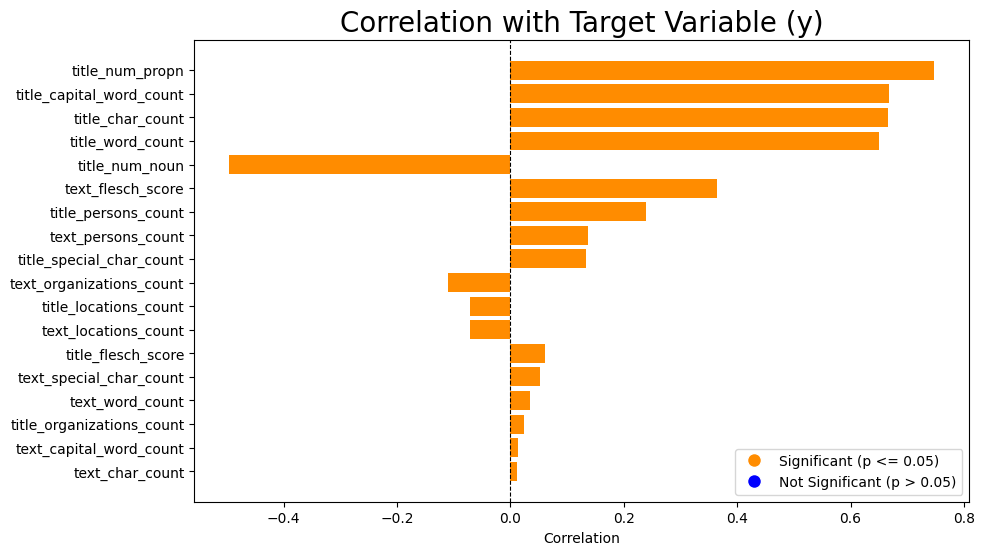

In [237]:
sorted_correlations = sorted(corr_results.items(), key=lambda x: abs(x[1]['correlation']), reverse=True)

# Plotting
plt.figure(figsize=(10, 6))
colors = ['darkorange' if data['p_value'] <= 0.05 else 'blue' for _, data in sorted_correlations]
correlation_values = [data['correlation'] for _, data in sorted_correlations]
features = [feat for feat, _ in sorted_correlations]

plt.barh(features, correlation_values, color=colors)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)  
plt.xlabel('Correlation')
plt.title('Correlation with Target Variable (y)', size = 20)
plt.gca().invert_yaxis()


# Adding a legend
significant_patch = plt.Line2D([0], [0], marker='o', color='w', label='Significant (p <= 0.05)', markerfacecolor='darkorange', markersize=10)
non_significant_patch = plt.Line2D([0], [0], marker='o', color='w', label='Not Significant (p > 0.05)', markerfacecolor='blue', markersize=10)
plt.legend(handles=[significant_patch, non_significant_patch], loc='lower right')

plt.show()

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Text preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and symbols
    text = re.sub(r'[^a-zA-Z0-9 \n\.]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to the 'combined_text' column
df['processed_text'] = df['combined_text'].apply(preprocess_text)

In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(
    df['processed_text'], df['target'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_train = tfidf_vectorizer.fit_transform(train_data)
tfidf_test = tfidf_vectorizer.transform(test_data)

# Convert TF-IDF matrices to DataFrames if needed (optional)
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [33]:
len(train_data)

35918

In [30]:
tfidf_train_df

,aaron,abadi,abandon,abba,abbott,abc,abdullah,abe,abedin,abid,...,zanupf,zarrab,zealand,zero,zika,zimbabw,zink,zone,zuckerberg,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
35914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
35915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
35916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027809,0.0,0.0


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = ["This is the first document.",
             "This document is the second document.",
             "And this is the third one.",
             "Is this the first document?"]

# Create the CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the documents into a document-term matrix
term_frequency_matrix = vectorizer.fit_transform(documents)

# Get the terms (features)
terms = vectorizer.get_feature_names_out()

# Convert the document-term matrix to an array and create a DataFrame
import pandas as pd
tf_matrix_df = pd.DataFrame(term_frequency_matrix.toarray(), columns=terms)


In [28]:
tf_matrix_df

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and symbols
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    tokens = [lemma(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to the 'combined_text' column
df['processed_text'] = df['combined_text'].apply(preprocess_text)

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['processed_text'], df['target'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_train = tfidf_vectorizer.fit_transform(train_data)
tfidf_test = tfidf_vectorizer.transform(test_data)

# Convert TF-IDF matrices to DataFrames if needed (optional)
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine TF-IDF features with other features if available
# You can concatenate the TF-IDF matrices with other numerical or categorical features

# Example:
# X_train = pd.concat([tfidf_train_df, train_data[['subject', 'date']]], axis=1)
# X_test = pd.concat([tfidf_test_df, test_data[['subject', 'date']]], axis=1)

# Train a simple model (example: Naive Bayes)
model = MultinomialNB()
model.fit(tfidf_train, train_labels)

# Make predictions on the test set
predictions = model.predict(tfidf_test)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9266146993318486
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4733
           1       0.93      0.91      0.92      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import corpora

# Assuming your DataFrame is named 'df'
# Drop irrelevant columns if needed
df = df[['title', 'text', 'subject', 'date', 'target']]

# Concatenate 'title' and 'text' columns to create a combined text column
df['combined_text'] = df['title'] + ' ' + df['text']

# Text preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and symbols
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to the 'combined_text' column
df['processed_text'] = df['combined_text'].apply(preprocess_text)

# # Create a bag-of-words representation using CountVectorizer
# vectorizer = CountVectorizer(max_features=5000)
# bow_matrix = vectorizer.fit_transform(df['processed_text'])

# # Convert the bag-of-words matrix to a Gensim Dictionary and Corpus
# corpus = corpora.MmCorpus(corpora.SvmLightCorpus(bow_matrix, num_terms=len(vectorizer.get_feature_names_out())))
# dictionary = corpora.Dictionary.from_corpus(corpus, id2word=dict(enumerate(vectorizer.get_feature_names_out())))

# # Perform LDA on the corpus
# num_topics = 5  # You can adjust the number of topics based on your dataset
# lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# # Print the topics
# topics = lda_model.print_topics(num_words=10)
# for topic in topics:
#     print(topic)


TypeError: SvmLightCorpus.__init__() got an unexpected keyword argument 'num_terms'